<a href="https://colab.research.google.com/github/And2300/Trash/blob/main/Experimento5_resina2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Funciones

In [2]:
def outliersx(lista,alpha):
  data = np.array(lista)#np.random.normal(0, 1, 1000).round(4)

  #if type(lista)==list:
  #  data = np.array(lista)
  #else:
  #  data = lista.copy()

  mean = np.mean(data)
  std = np.std(data)

  lower_bound = mean - alpha * std
  upper_bound = mean + alpha * std

  # Detectar outliers
  outliers = [x for x in data if x < lower_bound or x > upper_bound]

  # Data sin outliers
  data_without_outliers = [x for x in data if lower_bound <= x <= upper_bound]

  # Imprimir los outliers detectados y la data sin outliers
  #print('Los outliers detectados son:', outliers)
  #print('La data sin outliers es:', data_without_outliers)
  return data_without_outliers,round(mean,4) , round(std,4)

In [3]:
def dif_lis(lista1,lista2):
  dlis = list(map(lambda x,y: x-y ,lista1,lista2))
  dmean = round(np.array(dlis).mean(),4)
  dstd = round(np.array(dlis).std(),4)
  return dlis, dmean , dstd

In [4]:
def mean_std(listax):
  dmean = round(np.array(listax).mean(),4)
  dstd = round(np.array(listax).std(),4)
  return dmean , dstd

In [5]:
def med_std_lis(listas):
    medias = []
    desviaciones = []
    for lista1, lista2 in listas:
        _, media, desviacion = dif_lis(lista1, lista2)
        medias.append(media)
        desviaciones.append(desviacion)
    return medias, desviaciones

In [6]:
def med_std_lis_outl(listas):
    medias = []
    desviaciones = []
    for lista1, lista2 in listas:
        out_list , _, _ = dif_lis(lista1, lista2)
        _, media, desviacion = outliersx(out_list,alpha=1)
        medias.append(media)
        desviaciones.append(desviacion)
    return medias, desviaciones

In [7]:
def plot_hist(lista1,lista2, alpha):
    data1,_,_ = outliersx(lista1,2)
    data2,_,_ = outliersx(lista2,2)
    lista = list(map(lambda x,y: x-y ,lista1,lista2))
    data, mean,std = outliersx(lista,2)
    
    #escala
    mdis_teo = 0.00247 #g 

    #plot
    plt.figure(figsize=(30,10))

    plt.subplot(1,3,1)
    plt.hist(data1, color='b', bins=6);
    plt.title('Mojado', size=20)
    plt.xticks(size=18, color='y')

    plt.subplot(1,3,2)
    plt.hist(data2, color='r', bins=6);
    plt.title('Seco', size=20)
    plt.xticks(size=18, color='y')

    plt.subplot(1,3,3)
    plt.hist(data, color='g', bins=6);
    plt.title('Diferencia ' +  '\n' +'mean: '+str(round(mean,4)) + ', std: ' + str(round(std,4)) + '\n' 
              + '[' + str(round(min(lista)/mdis_teo,2)) + ' , ' + str(round(max(lista)/mdis_teo,2)) +']' + 'masa_teorica', size=20, color='k')
    plt.xticks(size=18, color='k');
    
    plt.show()
    #print('Diferencia ' +  '\n' +'mean: '+str(round(mean,4)) + ', std: ' + str(round(std,4)) + '\n' 
    #          + '[' + str(round(min(lista)/mdis_teo,2)) + ' , ' + str(round(max(lista)/mdis_teo,2)) +']' + 'masa_teorica')
    return 

# Resina | Pilares de diferentes tamaños. Método de válvula y manual

## Con Disco P5

In [8]:
listad5SM = [4.1393,4.1418,4.1410,4.1428,4.1408,4.1421,4.1422,4.1405,4.1406,4.1407]
listad5MM = [4.1487,4.1477,4.1483,4.1466,4.1477,4.1500,4.1473,4.1470,4.1468,4.1484]

listad5SA = [4.1385,4.1381,4.1419,4.1409,4.1400,4.1410,4.1411,4.1399,4.1410,4.1395]
listad5MA = [4.1445,4.1446,4.1480,4.1466,4.1463,4.1466,4.1462,4.1454,4.1449,4.1448]

## Con Disco P4

In [9]:
listad4SM = []
listad4MM = []

listad4SA = [4.1655,4.1632,4.1641,4.1632,4.1663,4.1654,4.1658,4.1645,4.1654,4.1658]
listad4MA = [4.1689,4.1680,4.1744,4.1694,4.1738,4.1702,4.1700,4.1688,4.1700,4.1737]

## Con Disco P3

In [10]:
listad3SM = [4.1386,4.1410,4.1409,4.1407,4.1408,4.1415,4.1409,4.1408,4.1412,4.1419]
listad3MM = [4.1462,4.1485,4.1482,4.1468,4.1439,4.1492,4.1479,4.1489,4.1481,4.1470]

listad3SA = [4.1407,4.1370,4.1395,4.1392,4.1397,4.1399,4.1387,4.1418,4.1406,4.1411]
listad3MA = [4.1433,4.1419,4.1443,4.1451,4.1450,4.1451,4.1461,4.1463,4.1467,4.1452]

## Con Disco P2

In [11]:
listad2SM = []
listad2MM = []

listad2SA = []
listad2MA = []

## Con Disco P1

In [12]:
listad1SM = []
listad1MM = []

listad1SA = []
listad1MA = []

## Sin disco P0

In [13]:
listad0SM = [4.1822,4.1842,4.1838,4.1841,4.1851,4.1846,4.1835,4.1847,4.1845,4.1843]
listad0MM = [4.1891,4.1910,4.1928,4.1913,4.1888,4.1926,4.1901,4.1932,4.1938,4.1967]

listad0SA = [4.1884,4.1855,4.1834,4.1856,4.1831,4.1831,4.1832,4.1829,4.1802,4.1809]
listad0MA = [4.1904,4.1907,4.1904,4.1885,4.1878,4.1877,4.1875,4.1904,4.1843,4.1843]

# Medidas discos

In [14]:
#diámetro en milímetros
discoD0 = [0]
discoD1 = [1]#1 pilares
discoD2 = [2*(0.399/np.pi)**0.5,2*(0.403/np.pi)**0.5,2*(0.356/np.pi)**0.5,2*(0.363/np.pi)**0.5,
           2*(0.358/np.pi)**0.5]#5 pilares
discoD3 = [2*(0.453/np.pi)**0.5,2*(0.493/np.pi)**0.5,2*(0.416/np.pi)**0.5,2*(0.441/np.pi)**0.5,
           2*(0.388/np.pi)**0.5,2*(0.387/np.pi)**0.5,2*(0.449/np.pi)**0.5,2*(0.425/np.pi)**0.5]# 11 pilares
discoD4 = [2*(0.380/np.pi)**0.5,2*(0.383/np.pi)**0.5,2*(0.315/np.pi)**0.5,2*(0.454/np.pi)**0.5,
           2*(0.354/np.pi)**0.5,2*(0.415/np.pi)**0.5,2*(0.382/np.pi)**0.5,2*(0.345/np.pi)**0.5] # 17 pilares
discoD5 = [2*(0.409/np.pi)**0.5,2*(0.373/np.pi)**0.5,2*(0.329/np.pi)**0.5,2*(0.379/np.pi)**0.5,
           2*(0.348/np.pi)**0.5,2*(0.417/np.pi)**0.5,2*(0.337/np.pi)**0.5,2*(0.285/np.pi)**0.5] # 23 pilares
#discoD6 = [8]

discos = [discoD0,discoD2,discoD5]
N_pilares = [0,1,23]
discosA = [discoD0,discoD2,discoD4,discoD5]
N_pilaresA = [0,5,17,23] 

In [15]:
def med_std_disco(discos):
  mediasDisco = []
  desviacionesDisco = []
  for disco in discos:
      dmeand, dstdd = mean_std(disco)
      mediasDisco.append(dmeand)
      desviacionesDisco.append(dstdd)
  return mediasDisco,desviacionesDisco

In [16]:
mediasDisco,_ = med_std_disco(discos)
mediasDiscoA,_ = med_std_disco(discosA)

# Gráfica volumen acumulado vs diámetro$^2$

In [17]:
def lmil(listaxx):
  lista1000 = [ x*1000 for x in listaxx]
  return lista1000

In [18]:
listasM = [
    (lmil(listad0MM), lmil(listad0SM)),
    #(lmil(listad1MM), lmil(listad1SM)),
    #(lmil(listad2MM), lmil(listad2SM)),
    (lmil(listad3MM), lmil(listad3SM)),
    #(lmil(listad4MM), lmil(listad4SM)),
    (lmil(listad5MM), lmil(listad5SM))
]

listasA = [
    (lmil(listad0MA), lmil(listad0SA)),
    #(lmil(listad1MA), lmil(listad1SA)),
    #(lmil(listad2MA), lmil(listad2SA)),
    (lmil(listad3MA), lmil(listad3SA)),
    (lmil(listad4MA), lmil(listad4SA)),
    (lmil(listad5MA), lmil(listad5SA))
] #en mililitros

In [19]:
mediasvolM, desviacionesvolM = med_std_lis(listasM)
mediasvolA, desviacionesvolA = med_std_lis(listasA)
print("Medias Manual:", mediasvolM)
print("Dsv Manual:", desviacionesvolM)

print("Medias Automático:", mediasvolA)
print("Dsv Automático:", desviacionesvolA)

Medias Manual: [7.84, 6.64, 6.67]
Dsv Manual: [2.1397, 1.4403, 1.4839]
Medias Automático: [4.57, 5.08, 5.8, 5.6]
Dsv Automático: [1.6112, 1.2131, 2.0425, 0.7043]


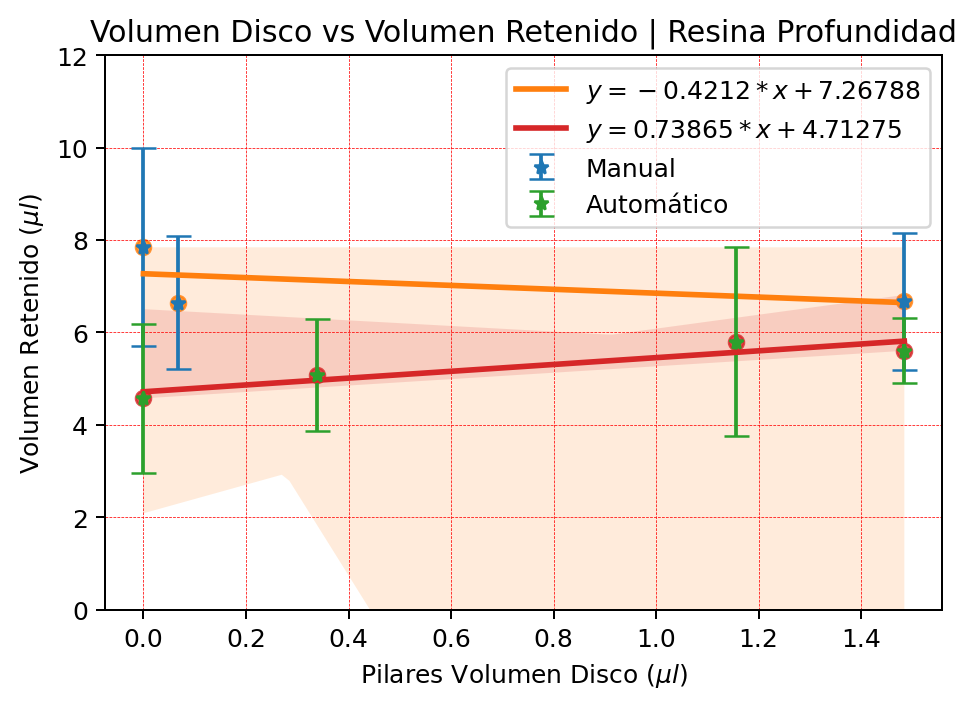

In [24]:
fig, ax = plt.subplots(figsize=(6,4), dpi=180)

#manual
mediasDiscoCuad = [np.pi*((x/2)**2)*0.18 for x in mediasDisco]
mediasDiscoCuad_pilares = [x*y for x,y in zip(mediasDiscoCuad,N_pilares)]
ax.errorbar(mediasDiscoCuad_pilares, mediasvolM, yerr=desviacionesvolM, fmt='*', capsize=5, label='Manual')
slope, intercept, r_value, pv, se = stats.linregress(mediasDiscoCuad_pilares, mediasvolM)
sns.regplot(x=mediasDiscoCuad_pilares, y=mediasvolM, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

#automático
mediasDiscoCuadA = [np.pi*((x/2)**2)*0.18 for x in mediasDiscoA]
mediasDiscoCuad_pilaresA = [x*y for x,y in zip(mediasDiscoCuadA,N_pilaresA)]
ax.errorbar(mediasDiscoCuad_pilaresA, mediasvolA, yerr=desviacionesvolA, fmt='*', capsize=5, label='Automático')
slope, intercept, r_value, pv, se = stats.linregress(mediasDiscoCuad_pilaresA, mediasvolA)
sns.regplot(x=mediasDiscoCuad_pilaresA, y=mediasvolA, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

ax.set_ylim(0, 12)
ax.set_xlabel('Pilares Volumen Disco ($\mu l$)')
ax.set_ylabel('Volumen Retenido ($\mu l$)')
ax.set_title('Volumen Disco vs Volumen Retenido | Resina Profundidad')
ax.grid(color='r', linestyle='--', linewidth=0.3)

plt.legend()
plt.show()

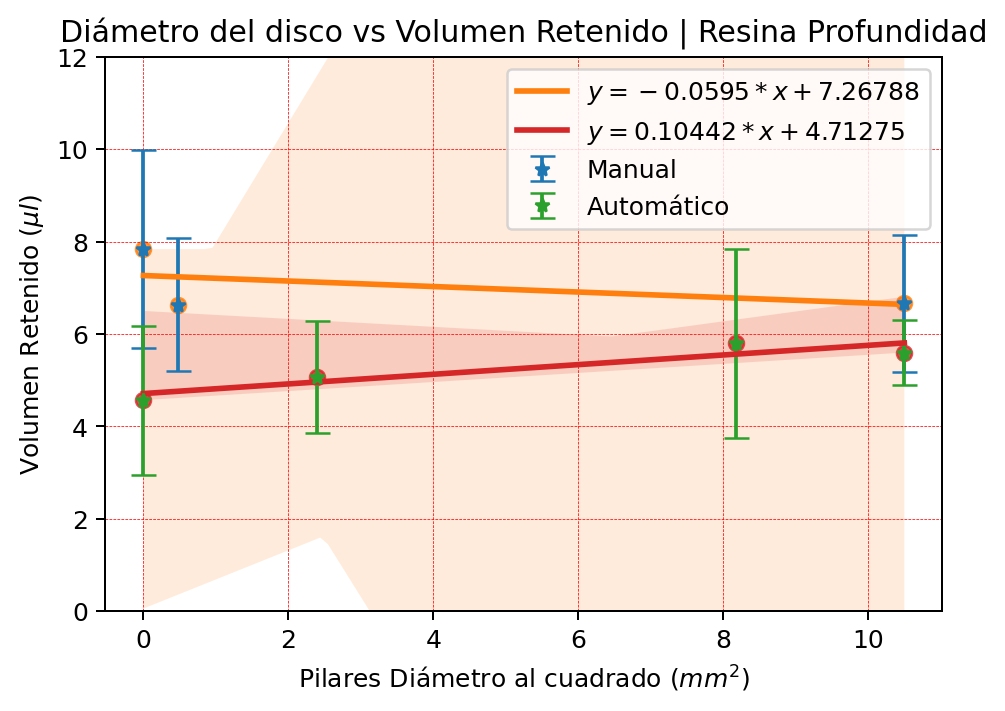

In [25]:
fig, ax = plt.subplots(figsize=(6,4), dpi=180)

#manual
mediasDiscoCuad = [x**2 for x in mediasDisco]
mediasDiscoCuad_pilares = [x*y for x,y in zip(mediasDiscoCuad,N_pilares)]
ax.errorbar(mediasDiscoCuad_pilares, mediasvolM, yerr=desviacionesvolM, fmt='*', capsize=5, label='Manual')
slope, intercept, r_value, pv, se = stats.linregress(mediasDiscoCuad_pilares, mediasvolM)
sns.regplot(x=mediasDiscoCuad_pilares, y=mediasvolM, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

#automático
mediasDiscoCuadA = [x**2 for x in mediasDiscoA]
mediasDiscoCuad_pilaresA = [x*y for x,y in zip(mediasDiscoCuadA,N_pilaresA)]
ax.errorbar(mediasDiscoCuad_pilaresA, mediasvolA, yerr=desviacionesvolA, fmt='*', capsize=5, label='Automático')
slope, intercept, r_value, pv, se = stats.linregress(mediasDiscoCuad_pilaresA, mediasvolA)
sns.regplot(x=mediasDiscoCuad_pilaresA, y=mediasvolA, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})

ax.set_ylim(0, 12)
ax.set_xlabel('Pilares Diámetro al cuadrado ($mm^2$)')
ax.set_ylabel('Volumen Retenido ($\mu l$)')
ax.set_title('Diámetro del disco vs Volumen Retenido | Resina Profundidad')
ax.grid(color='r', linestyle='--', linewidth=0.3)

plt.legend()
plt.show()